In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

alt.renderers.enable('notebook')
import CPTAC

Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******


In [2]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

In [8]:
protein_check = 'PPIP5K1'
phosProt = phos.filter(regex=protein_check)
gene = 'PIK3CA'

genedf = somatic_mutations[gene].to_frame()
cross = genedf.add(phosProt, fill_value = 0)
#print(cross.head())

pcutoff = 0.05/len(cross.columns)
print(pcutoff)

mutated = cross.loc[cross[gene] == 1.0]
wt = cross.loc[cross[gene] == 0.0]

for loc in cross.columns:
    if not loc == gene:
        oneSitedf_m = mutated[[loc, gene]].dropna(axis=0)
        oneSitedf_wt = wt[[loc, gene]].dropna(axis=0)
        ttest = scipy.stats.ttest_ind(oneSitedf_m[loc], oneSitedf_wt[loc])
        print("Results for " + loc)
        print(ttest)



0.008333333333333333
Results for PPIP5K1-S1037
Ttest_indResult(statistic=-1.1711841541629056, pvalue=0.24696775515467212)
Results for PPIP5K1-S1152
Ttest_indResult(statistic=1.5430554383029447, pvalue=0.12938510898356503)
Results for PPIP5K1-S944
Ttest_indResult(statistic=-0.4457284443977469, pvalue=0.6570125774698448)
Results for PPIP5K1-S964
Ttest_indResult(statistic=-0.36832226205656987, pvalue=0.7136306937259556)
Results for PPIP5K1-S987
Ttest_indResult(statistic=0.6464233210685427, pvalue=0.5199526074446187)


[Text(0, 0.5, 'Proteomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

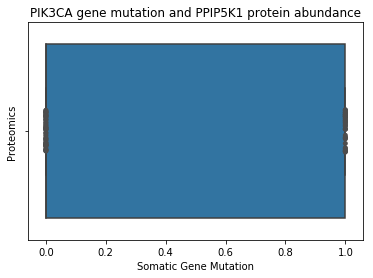

In [12]:
somatic_boxplot = sns.boxplot(data=cross, x=gene)
somatic_boxplot.set_title(gene + " gene mutation and " + protein_check + " protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x=gene,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")